In [1]:
import pandas as pd
import os

In [2]:
df=pd.read_csv("D:\pands\Sales_data\Sales_April_2019.csv")

files=[file for file in os.listdir("D:\pands\Sales_data")]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv(r'D:/pands/Sales_data/'+file)
    all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv',index=False)    
    

In [3]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()
all_data.head(520)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
515,177051,Wired Headphones,2,11.99,04/07/19 08:41,"777 Adams St, Boston, MA 02215"
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"


In [5]:
all_data=all_data[all_data['Product']!='Product']
#temp_df.head(30)

In [6]:
all_data.dropna(inplace=True)

In [7]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [8]:
all_data.shape

(185950, 6)

In [9]:
all_data['Order ID']=all_data['Order ID'].astype('int')

In [10]:
all_data['Price Each']=all_data['Price Each'].astype('float')

In [11]:
#all_data.drop(1,axis=0)


all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int')




In [12]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
all_data['month']= all_data['Order Date'].dt.month

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [15]:
all_data['Quantity Ordered'].unique()

array([2, 1, 3, 5, 4, 7, 6, 8, 9])

In [16]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
max_sales_month=all_data.groupby(['month'],as_index=False)['sales'].sum().sort_values(by='sales',ascending=False).head(12)
max_sales_month

,month,sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


In [20]:
result=all_data.groupby('month').sum()
months=range(1,13)

C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\22230266.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=all_data.groupby('month').sum()


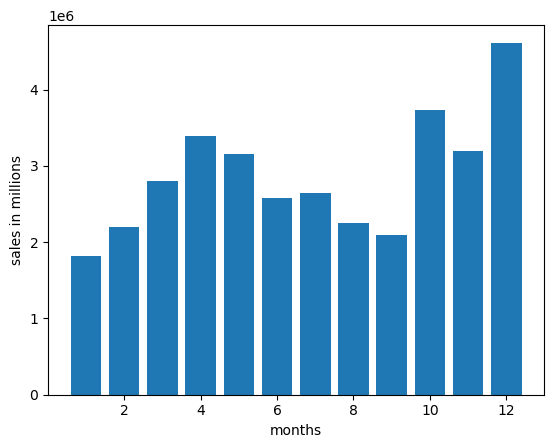

In [21]:
#sns.barplot(x='month',y=result['sales'],data=all_data)
plt.bar(months,result['sales'])
#plt.xtics(months)
plt.xlabel('months')
plt.ylabel('sales in millions')
plt.show()

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [23]:
all_data['address']=all_data['Purchase Address'].str.split(',')

In [24]:
all_data_Add=pd.DataFrame(all_data['address'].tolist()).add_prefix('add')

In [25]:
all_data_Add.head()

,add0,add1,add2
0,917 1st St,Dallas,TX 75001
1,682 Chestnut St,Boston,MA 02215
2,669 Spruce St,Los Angeles,CA 90001
3,669 Spruce St,Los Angeles,CA 90001
4,333 8th St,Los Angeles,CA 90001


In [26]:
all_data_Add['state']=all_data_Add['add2'].str.split(' ')
all_data_Add1=pd.DataFrame(all_data_Add['state'].tolist()).add_prefix('st')
all_data_Add=pd.concat([all_data_Add,all_data_Add1],axis=1)
all_data_Add['adddd']=all_data_Add[['add1','st1']].apply(",".join,axis=1)
all_data_Add.head()

,add0,add1,add2,state,st0,st1,st2,adddd
0,917 1st St,Dallas,TX 75001,"[, TX, 75001]",,TX,75001,"Dallas,TX"
1,682 Chestnut St,Boston,MA 02215,"[, MA, 02215]",,MA,02215,"Boston,MA"
2,669 Spruce St,Los Angeles,CA 90001,"[, CA, 90001]",,CA,90001,"Los Angeles,CA"
3,669 Spruce St,Los Angeles,CA 90001,"[, CA, 90001]",,CA,90001,"Los Angeles,CA"
4,333 8th St,Los Angeles,CA 90001,"[, CA, 90001]",,CA,90001,"Los Angeles,CA"


In [27]:
all_data_Add['add1']=all_data_Add['adddd']

In [28]:
all_data_Add.drop(columns=['add2','state','st0','adddd'],inplace=True)

In [29]:
all_data_Add.head()

,add0,add1,st1,st2
0,917 1st St,"Dallas,TX",TX,75001
1,682 Chestnut St,"Boston,MA",MA,02215
2,669 Spruce St,"Los Angeles,CA",CA,90001
3,669 Spruce St,"Los Angeles,CA",CA,90001
4,333 8th St,"Los Angeles,CA",CA,90001


In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"[917 1st St, Dallas, TX 75001]"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"[682 Chestnut St, Boston, MA 02215]"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"[669 Spruce St, Los Angeles, CA 90001]"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"[669 Spruce St, Los Angeles, CA 90001]"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"[333 8th St, Los Angeles, CA 90001]"


In [31]:
all_data=pd.concat([all_data,all_data_Add],axis=1)

In [32]:

all_data.drop(columns=['address'],inplace=True)

In [33]:
all_data.rename(columns={'add0':'Street','add1':'city','st1':'State code','st2':'Zip'},inplace=True)

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street,city,State code,Zip
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,917 1st St,"Dallas,TX",TX,75001
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,669 Spruce St,"Los Angeles,CA",CA,90001
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,669 Spruce St,"Los Angeles,CA",CA,90001
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,333 8th St,"Los Angeles,CA",CA,90001
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,381 Wilson St,"San Francisco,CA",CA,94016


In [35]:
all_data['city'].unique()

array([' Dallas,TX', ' Los Angeles,CA', ' San Francisco,CA',
       ' Seattle,WA', ' Atlanta,GA', ' Boston,MA', ' New York City,NY',
       ' Portland,OR', ' Austin,TX', ' Portland,ME', nan], dtype=object)

In [36]:
max_sales_city=all_data.groupby(['city'],as_index=False)['sales'].sum().sort_values(by='sales',ascending=False).head(10)
max_sales_city

,city,sales
8,"San Francisco,CA",8330815.82
4,"Los Angeles,CA",5549789.54
5,"New York City,NY",4568833.76
2,"Boston,MA",3648334.91
0,"Atlanta,GA",2704927.44
9,"Seattle,WA",2695875.77
3,"Dallas,TX",2688844.55
7,"Portland,OR",1859697.46
1,"Austin,TX",1827918.13
6,"Portland,ME",455898.39


In [37]:
sale_amt=all_data.groupby('city').sum()

C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\2724853013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_amt=all_data.groupby('city').sum()


C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\3076245701.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=all_data.groupby('city').sum()


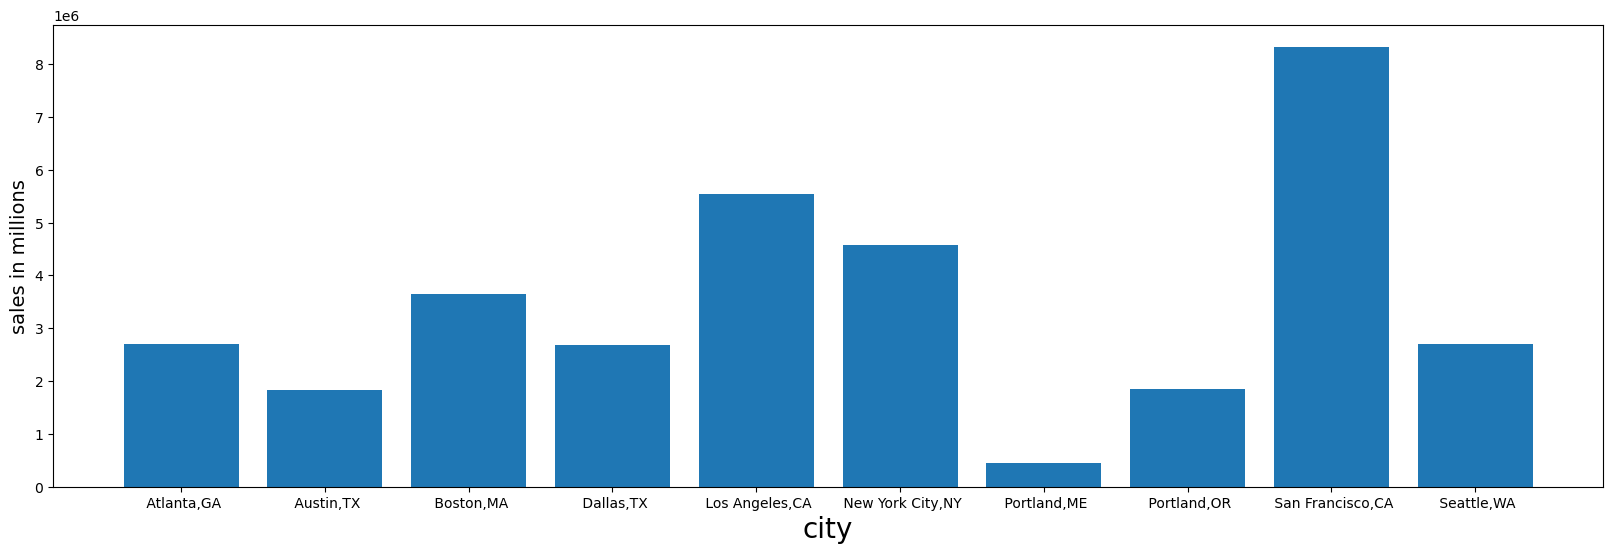

In [38]:
#sns.barplot(x='month',y=result['sales'],data=all_data)
result=all_data.groupby('city').sum()
plt.figure(figsize=(20,6))

cities=[city for city, df in all_data.groupby('city')]
plt.bar(cities,result['sales'])
plt.xticks(cities,size=10)
plt.xlabel('city',size=20)
plt.ylabel('sales in millions',size=14)
plt.show()

In [39]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute
all_data['time']=all_data['Order Date'].dt.time

In [40]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street,city,State code,Zip,Hour,minute,time
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,917 1st St,"Dallas,TX",TX,75001,8.0,46.0,08:46:00
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,669 Spruce St,"Los Angeles,CA",CA,90001,22.0,30.0,22:30:00
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,669 Spruce St,"Los Angeles,CA",CA,90001,14.0,38.0,14:38:00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,333 8th St,"Los Angeles,CA",CA,90001,14.0,38.0,14:38:00
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,381 Wilson St,"San Francisco,CA",CA,94016,9.0,27.0,09:27:00


In [41]:
max_sales_time=all_data.groupby(['Hour'],as_index=False)['sales'].count().sort_values(by='sales',ascending=False).head(24)
max_sales_time

,Hour,sales
19,19.0,12905
12,12.0,12587
11,11.0,12411
18,18.0,12280
20,20.0,12228
13,13.0,12129
14,14.0,10984
10,10.0,10944
21,21.0,10921
17,17.0,10899


Text(0, 0.5, 'count of orders')

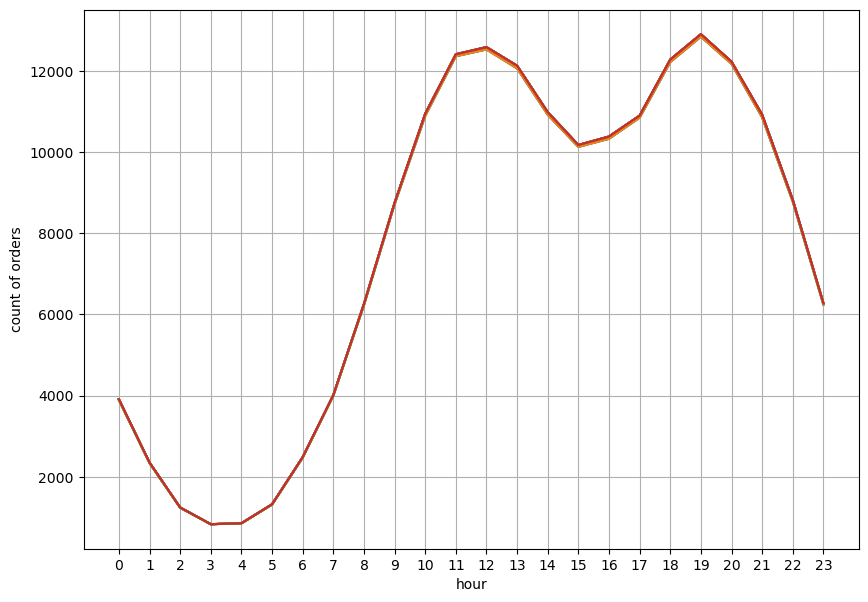

In [42]:
hours=[hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(10,7))
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('hour',size=10)
plt.ylabel('count of orders',size=10)

In [43]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','grouped']].drop_duplicates()
df.head()

C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\2363516904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
3,176560.0,"Google Phone,Wired Headphones"
18,176574.0,"Google Phone,USB-C Charging Cable"
30,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586.0,"AAA Batteries (4-pack),Google Phone"
119,176672.0,"Lightning Charging Cable,USB-C Charging Cable"


In [44]:
from itertools import combinations
from collections import Counter

In [45]:
count=Counter()

for row in df['grouped'].astype(str):
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))

    
for key, value in count.most_common(20):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

In [46]:
count=Counter()

for row in df['grouped'].astype(str):
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,3)))

    
for key, value in count.most_common(10):
    print(key,value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [47]:
product_grp=all_data.groupby('Product')
product_grp.sum()

C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\4087255562.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_grp.sum()


,Order ID,Quantity Ordered,Price Each,month,sales,Hour,minute
Product,,,,,,,
20in Monitor,9.508897e+08,4129.0,451068.99,29336.0,454148.71,58764.0,122252.0
27in 4K Gaming Monitor,1.442589e+09,6244.0,2429637.70,44440.0,2435097.56,90916.0,184331.0
27in FHD Monitor,1.724224e+09,7550.0,1125974.93,52558.0,1132424.50,107540.0,219948.0
34in Ultrawide Monitor,1.418986e+09,6199.0,2348718.19,43304.0,2355558.01,89076.0,183480.0
AA Batteries (4-pack),4.744174e+09,27635.0,79015.68,145558.0,106118.40,298342.0,609039.0
AAA Batteries (4-pack),4.764959e+09,31017.0,61716.59,146370.0,92740.83,297332.0,612113.0
Apple Airpods Headphones,3.579120e+09,15661.0,2332350.00,109477.0,2349150.00,223304.0,455570.0
Bose SoundSport Headphones,3.071496e+09,13457.0,1332366.75,94113.0,1345565.43,192445.0,392603.0
Flatscreen TV,1.110943e+09,4819.0,1440000.00,34224.0,1445700.00,68815.0,142789.0


In [48]:
max_sales_product=all_data.groupby(['Product'],as_index=False)['sales'].sum().sort_values(by='sales',ascending=False).head(20)
max_sales_product

,Product,sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56
3,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
8,Flatscreen TV,1445700.00
7,Bose SoundSport Headphones,1345565.43
2,27in FHD Monitor,1132424.50


C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\2548540404.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Qty_ordered=product_grp.sum()['Quantity Ordered']


Text(0, 0.5, 'sales amount')

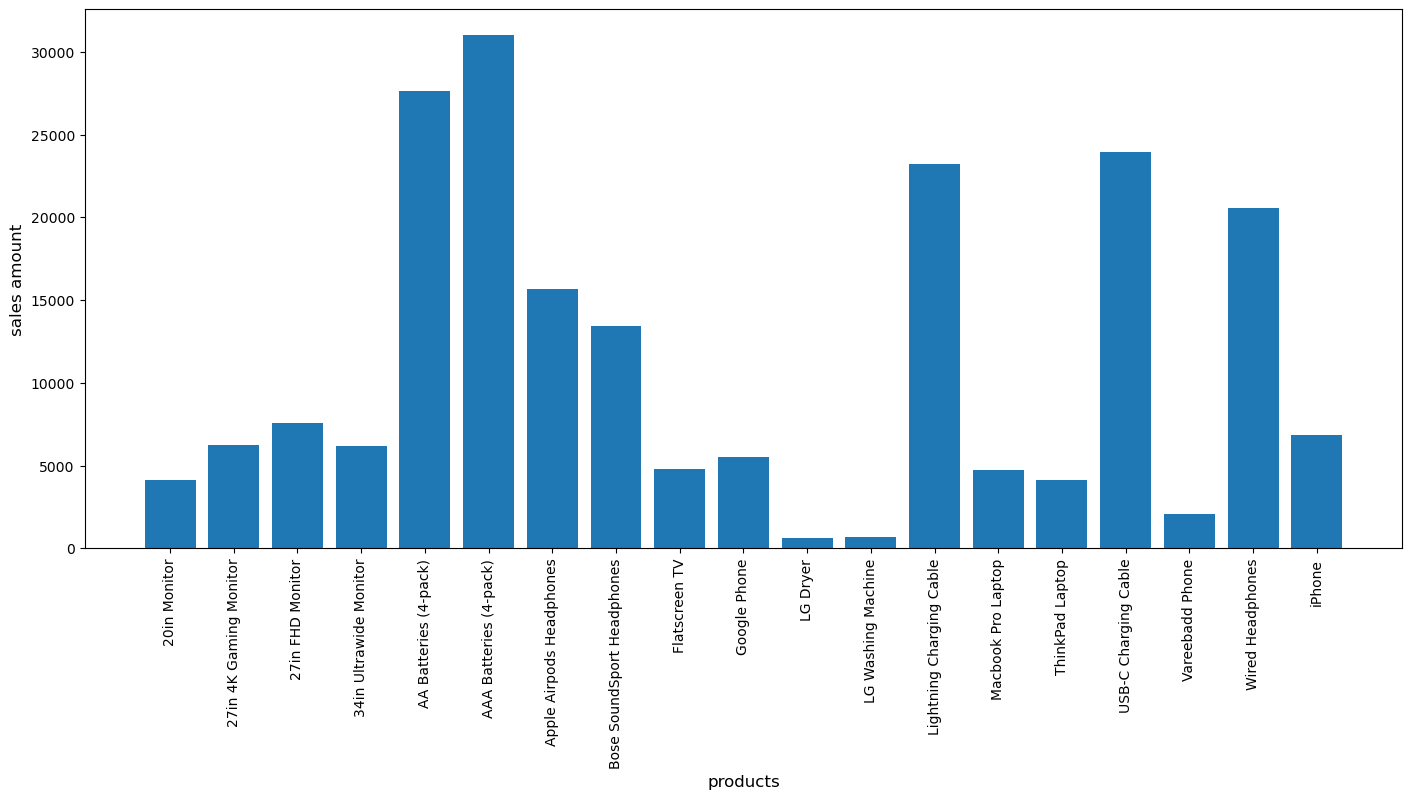

In [49]:
product_grp=all_data.groupby('Product')
Qty_ordered=product_grp.sum()['Quantity Ordered']
products= [product for product, df in product_grp]
plt.figure(figsize=(17,7))
plt.bar(products,Qty_ordered)
plt.xticks(products,rotation='vertical',size=10)
plt.xlabel('products',size=12)
plt.ylabel('sales amount',size=12)

C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\633514260.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices=all_data.groupby('Product').mean()['Price Each']
C:\Users\Ananta\AppData\Local\Temp\ipykernel_12236\633514260.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


<Figure size 2000x700 with 0 Axes>

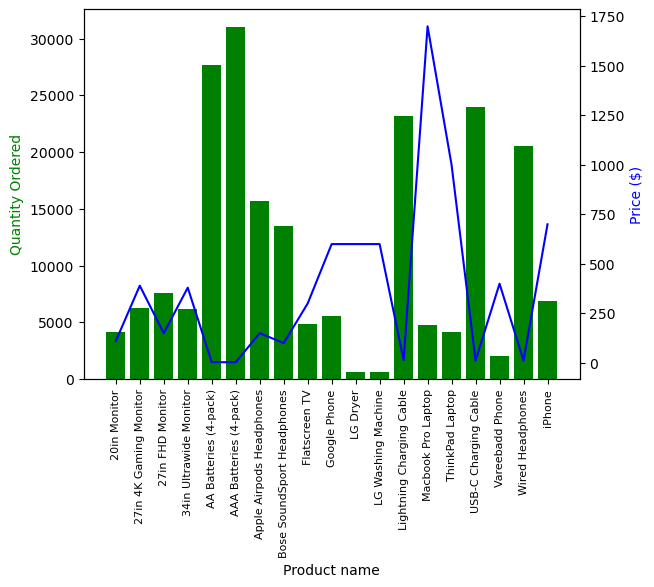

In [53]:
prices=all_data.groupby('Product').mean()['Price Each']
plt.figure(figsize=(20,7))
fig,ax1=plt.subplots()


ax2=ax1.twinx()
ax1.bar(products,Qty_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8) 
plt.show()    